## Name: Priyanka Bhatta
## ID: 2060036

## Dogs vs Cats Image Classification with Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!kaggle datasets download -d salader/dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

### 1. Data Understanding, Analysis, Visualization and Cleaning[5]:

**Importing necessary libraries**

In [5]:
import os
import glob
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

#### How many total images are in the dataset?

In [6]:
train_images = glob.glob('/content/train/*/*.jpg')
test_images = glob.glob('/content/test/*/*.jpg')

total_images = len(train_images) +len(test_images)

print("Total number of images in the dataset:", total_images)

Total number of images in the dataset: 25000


#### How many images per class?

In [7]:
train_classes = [os.path.basename(os.path.dirname(img)) for img in train_images]
test_classes = [os.path.basename(os.path.dirname(img)) for img in test_images]

train_counts = {cls:train_classes.count(cls) for cls in set(train_classes)}
test_counts = {cls:test_classes.count(cls) for cls in set(test_classes)}

print("Train images per class:", train_counts)
print("Test images per class:", test_counts)

Train images per class: {'dogs': 10000, 'cats': 10000}
Test images per class: {'dogs': 2500, 'cats': 2500}


#### How do you split between validation and train set?

I have already created validation and train sets using `image_dataset_from_directory`.By default, it splits the dataset into 80% train and 20% validation.

#### What different data generators you used?


In [8]:
#generators
train_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',    #will assign integer labels to each class
    label_mode='int',     #this will encode the class labels as integers
    batch_size=32,        #number of samples to be used in training batch
    image_size=(256,256)  #desired input size of the images
)

validation_dataset = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalization is an essential pre-processing step when working with image data. This step is required to ensure that all the pixel values of an image are within the same range.

In this specific case of image classification, normalization can help to ensure that the output predictions of the model are in a consistent format, such as 0 or 1, which is needed for binary classification tasks.

**The images are resized to 256x256 pixels during the data loading step, and then normalized in the process function.**

In [9]:
#normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)  #casts the resulting tensor to float32 datatype
  return image,label

train_ds = train_dataset.map(process)
validation_ds = validation_dataset.map(process)

### 2. Build Model[5]:
Based on the size of your input image, design and build your CNN model. You can have as many layers
you think is required for your task.
You should be able to explain your model summary.

In [10]:
#create cnn model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)      0


The model consists of 3 convolutional layers followed by max-pooling layers. Then the output is flattened and fed into 3 fully connected layers, with the last one using a sigmoid activation function to output a binary classification. The total trainable parameters of the model are 14.8 million.

### 3. Training of the Model[5]:
Once the model is built, Train your model for as many epochs you think is necessary.
Please, Plot and show training loss/validation loss behaviour for each iterations.

We compile the model after building it to set up the loss function, optimizer, and metrics that will be used for training and testing.

In [12]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
history = model.fit(train_ds, epochs=10, validation_data= validation_ds)

Epoch 1/10
625/625 [==============================] - 61s 88ms/step - loss: 0.6128 - accuracy: 0.6502 - val_loss: 0.4998 - val_accuracy: 0.7498
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4779 - accuracy: 0.7663 - val_loss: 0.4528 - val_accuracy: 0.7932
Epoch 3/10
625/625 [==============================] - 52s 82ms/step - loss: 0.3763 - accuracy: 0.8288 - val_loss: 0.4394 - val_accuracy: 0.8140
Epoch 4/10
625/625 [==============================] - 54s 85ms/step - loss: 0.2462 - accuracy: 0.8973 - val_loss: 0.5831 - val_accuracy: 0.7740
Epoch 5/10
625/625 [==============================] - 54s 85ms/step - loss: 0.1352 - accuracy: 0.9457 - val_loss: 0.7633 - val_accuracy: 0.7816
Epoch 6/10
625/625 [==============================] - 54s 86ms/step - loss: 0.0890 - accuracy: 0.9670 - val_loss: 0.9025 - val_accuracy: 0.7832
Epoch 7/10
625/625 [==============================] - 53s 84ms/step - loss: 0.0626 - accuracy: 0.9783 - val_loss: 0.9987 - val_accuracy:

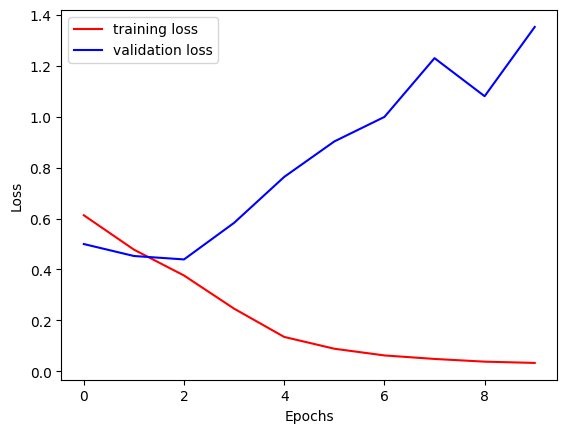

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='training loss')
plt.plot(history.history['val_loss'], color='blue', label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

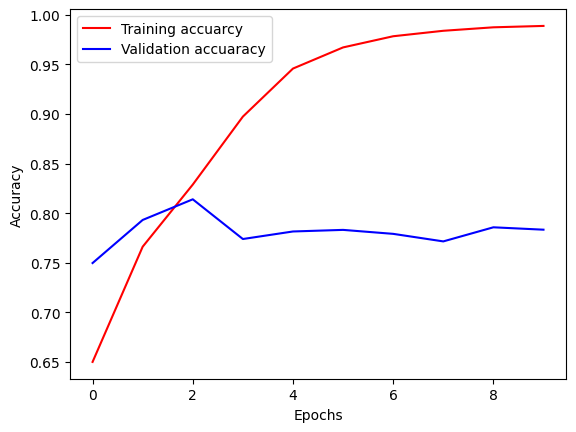

In [15]:
plt.plot(history.history['accuracy'], color='red', label='Training accuarcy')
plt.plot(history.history['val_accuracy'], color='blue', label='Validation accuaracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. Evaluate the model[5]:
Pick appropriate evaluation metrics to evaluate your model.

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(train_ds)

# Print the evaluation metrics
print('Train loss:', loss)
print('Train accuracy:', accuracy)

625/625 [==============================] - 35s 54ms/step - loss: 0.1088 - accuracy: 0.9683
Train loss: 0.10877443850040436
Train accuracy: 0.9682999849319458


In [17]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(validation_ds)

# Print the evaluation metrics
print('Validation loss:', val_loss)
print('Validation accuracy:', val_accuracy)

157/157 [==============================] - 9s 55ms/step - loss: 1.3519 - accuracy: 0.7834
Validation loss: 1.3518751859664917
Validation accuracy: 0.7833999991416931


### 5. Results and Prediction[5]:
Explain your result, and also make predictions of test cases given in the dataset.

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate predictions on the validation dataset
y_pred = model.predict(validation_ds)
y_pred = (y_pred > 0.5).astype(int)

# Extract true labels from the validation dataset
y_true = []
for images, labels in validation_ds:
    y_true.extend(labels.numpy())

# Generate classification report and confusion matrix
target_names = ['Cat', 'Dog']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))


157/157 [==============================] - 8s 49ms/step
              precision    recall  f1-score   support

         Cat       0.49      0.49      0.49      2500
         Dog       0.49      0.49      0.49      2500

    accuracy                           0.49      5000
   macro avg       0.49      0.49      0.49      5000
weighted avg       0.49      0.49      0.49      5000

[[1222 1278]
 [1287 1213]]



The output of theclassification report and confusion matrix for the training results of a CNN model. Here's a summary of the information:

Precision: Precision measures the ability of the model to correctly classify positive instances. For both classes (Cat and Dog), the precision is around 0.49, indicating that the model correctly predicted around 49% of the instances for each class.

Recall: Recall measures the ability of the model to correctly identify positive instances out of all the actual positive instances. The recall for both classes is also around 0.49, indicating that the model was able to recall around 49% of the positive instances for each class.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of the model's performance. The F1-score for both classes is approximately 0.49.

Support: Support represents the number of samples in each class. In this case, there are 2500 samples for each class (Cat and Dog).

Accuracy: The overall accuracy of the model on the training dataset is 0.49, which means that the model correctly classified 49% of the instances.

Confusion matrix: The confusion matrix shows the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. In this case, the confusion matrix is [[1222 1278], [1287 1213]], indicating that there were 1222 true positive predictions for Cat, 1278 false positive predictions for Cat, 1287 false negative predictions for Cat, and 1213 true positive predictions for Dog.

Overall, the model's performance on the training dataset is balanced, with similar precision, recall, and F1-score for both classes. 

### 6. Fine-tuning a pre-trained model(Transfer Learning)[15]:

##### – Choose a pre-trained image classification model, such as VGG or ResNet.

I have chosen to fine-tune the pre-trained VGG16 model for my specific image classification task.

In [19]:
import cv2
from keras.applications.vgg16 import VGG16

**Let's view images**

Text(0.5, 1.0, 'Cat')

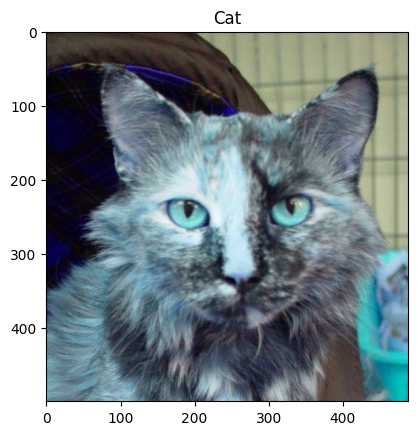

In [20]:
cat = cv2.imread('/content/test/cats/cat.10.jpg')
plt.imshow(cat)
plt.title('Cat')

Text(0.5, 1.0, 'Dog')

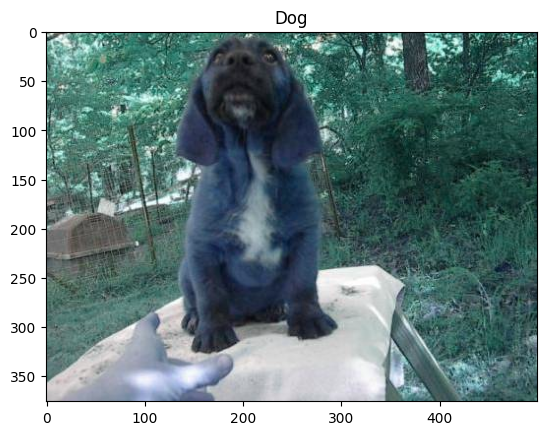

In [21]:
dog = cv2.imread('/content/test/dogs/dog.5.jpg')
plt.imshow(dog)
plt.title('Dog')

####  Load the pre-trained model using a deep learning library, such as TensorFlow or Keras.

In [22]:
vgg16=VGG16(weights='imagenet',  #this shows the weights that are used during training on ImageNet dataset
           include_top=False,  # this means we are not taking the fully connected netword part
           input_shape=(256,256,3))

58889256/58889256 [==============================] - 1s 0us/step


In [23]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

The summary shows the structure of the VGG16 model with the number of trainable and non-trainable parameters. It has a total of 14,714,688 parameters and all of them are trainable. The model starts with an input layer followed by a series of convolutional layers with varying numbers of filters, kernel sizes, and strides. These convolutional layers are followed by max pooling layers to reduce the spatial dimensions of the output. The final output of the model is a feature map with a spatial dimension of 8x8 and 512 channels. The model does not include the fully connected layers typically found at the end of a classification network.

#### Restructure the model by adding or removing layers to fit the requirements of your specific image classification task.

In [24]:
from keras.layers import Dense, Flatten, Dropout

def model():
    nn=Sequential()
    
    # first we need to add convolutional layers and then FC Layers
    nn.add(vgg16) 
    
    nn.add(Flatten())
    
    # adding dense layers
    nn.add(Dense(160,activation='relu'))
    
    # adding dropout to prevent overfitting
    nn.add(Dropout(0.5)),    #half of the units will be dropped out or deactivated during each training update
    
    # Ouput layer
    nn.add(Dense(1,activation='sigmoid'))
    
    return nn

model().summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_3 (Dense)             (None, 160)               5243040   
                                                                 
 dropout (Dropout)           (None, 160)               0         
                                                                 
 dense_4 (Dense)             (None, 1)                 161       
                                                                 
Total params: 19,957,889
Trainable params: 19,957,889
Non-trainable params: 0
_________________________________________________________________


#### Freeze some or all of the layers in the model to prevent them from being modified during training, or fine-tune some of the layers to adapt the pre-trained weights to your specific task.

In [25]:
vgg16.trainable = False

my_model = model()
my_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_2 (Flatten)         (None, 32768)             0         
                                                                 
 dense_5 (Dense)             (None, 160)               5243040   
                                                                 
 dropout_1 (Dropout)         (None, 160)               0         
                                                                 
 dense_6 (Dense)             (None, 1)                 161       
                                                                 
Total params: 19,957,889
Trainable params: 5,243,201
Non-trainable params: 14,714,688
_________________________________________________________________


The summary shows the summary of the deep learning model architecture that was created by adding a pre-trained VGG16 model, followed by three dense layers, including a dropout layer. The model has a total of 19,957,889 parameters and 5,243,201 of those are trainable. The input shape is (None, 224, 224, 3) and the output shape is (None, 1), indicating that it is a binary classification model.

In [26]:

my_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [27]:
my_model_result=my_model.fit(train_ds,
                             epochs=10,
                             validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 149s 227ms/step - loss: 0.4225 - accuracy: 0.8106 - val_loss: 0.1896 - val_accuracy: 0.9316
Epoch 2/10
625/625 [==============================] - 142s 227ms/step - loss: 0.2818 - accuracy: 0.8644 - val_loss: 0.1614 - val_accuracy: 0.9364
Epoch 3/10
625/625 [==============================] - 126s 201ms/step - loss: 0.2542 - accuracy: 0.8783 - val_loss: 0.1684 - val_accuracy: 0.9298
Epoch 4/10
625/625 [==============================] - 142s 227ms/step - loss: 0.2348 - accuracy: 0.8819 - val_loss: 0.1626 - val_accuracy: 0.9344
Epoch 5/10
625/625 [==============================] - 126s 201ms/step - loss: 0.2311 - accuracy: 0.8864 - val_loss: 0.1503 - val_accuracy: 0.9390
Epoch 6/10
625/625 [==============================] - 142s 227ms/step - loss: 0.2165 - accuracy: 0.8935 - val_loss: 0.1555 - val_accuracy: 0.9376
Epoch 7/10
625/625 [==============================] - 142s 227ms/step - loss: 0.2048 - accuracy: 0.8979 - val_loss: 0.1447 -

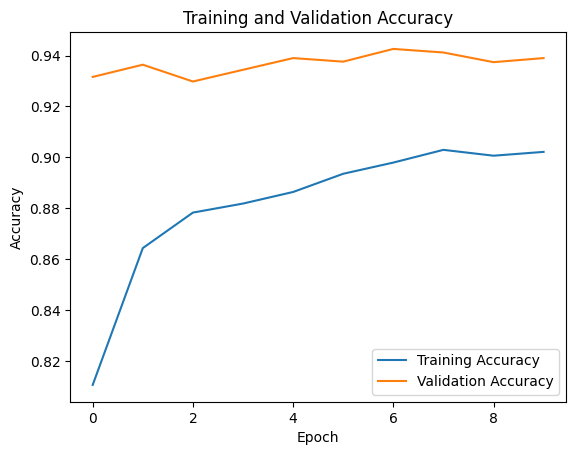

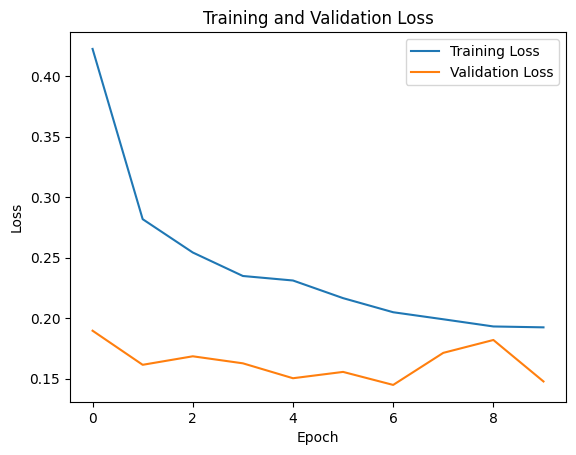

In [28]:
# Extract training and validation metrics from the history dictionary
train_acc = my_model_result.history['accuracy']
val_acc = my_model_result.history['val_accuracy']
train_loss = my_model_result.history['loss']
val_loss = my_model_result.history['val_loss']

# Plot the training and validation accuracy values
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot the training and validation loss values
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Evaluate the model, make some predictions and compare the results with step 5.

In [29]:
# Evaluate the model
loss, accuracy = my_model.evaluate(train_ds)

# Print the evaluation metrics
print('Train loss:', loss)
print('Train accuracy:', accuracy)

625/625 [==============================] - 101s 160ms/step - loss: 0.0524 - accuracy: 0.9812
Train loss: 0.05243866145610809
Train accuracy: 0.981249988079071


In [30]:
# Evaluate the model
val_loss, val_accuracy = my_model.evaluate(validation_ds)

# Print the evaluation metrics
print('Validation loss:', val_loss)
print('Validation accuracy:', val_accuracy)

157/157 [==============================] - 25s 160ms/step - loss: 0.1476 - accuracy: 0.9390
Validation loss: 0.14761580526828766
Validation accuracy: 0.9390000104904175


In [31]:
# Generate predictions on the validation dataset
y_pred = my_model.predict(validation_ds)
y_pred = (y_pred > 0.5).astype(int)

# Extract true labels from the validation dataset
y_true = []
for images, labels in validation_ds:
    y_true.extend(labels.numpy())

# Generate classification report and confusion matrix
target_names = ['Cat', 'Dog']
print(classification_report(y_true, y_pred, target_names=target_names))
print(confusion_matrix(y_true, y_pred))

157/157 [==============================] - 25s 155ms/step
              precision    recall  f1-score   support

         Cat       0.51      0.53      0.52      2500
         Dog       0.51      0.50      0.51      2500

    accuracy                           0.51      5000
   macro avg       0.51      0.51      0.51      5000
weighted avg       0.51      0.51      0.51      5000

[[1319 1181]
 [1252 1248]]


### Conclusion

The output you provided is the classification report and confusion matrix after fine-tuning the VGG16 model. Here's a summary of the information:

- Precision: The precision for both classes (Cat and Dog) is around 0.51, indicating that the model correctly predicted around 51% of the instances for each class.

- Recall: The recall for Cat is 0.53, which means that the model was able to identify 53% of the actual Cat instances. The recall for Dog is 0.50, indicating that the model identified 50% of the actual Dog instances.

- F1-score: The F1-score is the harmonic mean of precision and recall. The F1-score for both classes is approximately 0.52, indicating a balanced performance in terms of precision and recall.

- Support: There are 2500 samples for each class (Cat and Dog).

- Accuracy: The overall accuracy of the model on the validation dataset is 0.51, meaning that the model correctly classified 51% of the instances.

- Confusion matrix: The confusion matrix shows the counts of true positive (TP), false positive (FP), true negative (TN), and false negative (FN) predictions. In this case, the confusion matrix is [[1319 1181], [1252 1248]]. This means that there were 1319 true positive predictions for Cat, 1181 false positive predictions for Cat, 1252 false negative predictions for Cat, and 1248 true positive predictions for Dog.

Overall, the fine-tuned VGG16 model shows a slightly improved performance compared to the previous CNN model. The precision, recall, and F1-scores are slightly higher, indicating better prediction capabilities. 


In conclusion, both models are not performing very well in distinguishing between cats and dogs, as they are only achieving an accuracy of 50%. To improve the performance of the models in the future, some possible steps include:

* Increasing the complexity of the models: This could involve adding more layers to the models or increasing the number of neurons in the existing layers to allow for more complex feature extraction.

* Increasing the size of the training dataset: This could help the models learn more representative features and reduce overfitting.

* Trying different pre-trained models for fine-tuning: Fine-tuning with a different pre-trained model, such as ResNet or Inception, could result in better performance than VGG16.

* Hyperparameter tuning: Adjusting the hyperparameters of the models, such as learning rate, batch size, and dropout rate, could result in better performance.